In [1]:
#Simple Linear Regression 
#Work on Advertising.csv dataset

In [2]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#To load Dataset
df=pd.read_csv("advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#To remove Unnamed: 0 column from dataset df permanently
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
#How many records and columns
df.shape

(200, 4)

In [7]:
#To check null values 
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

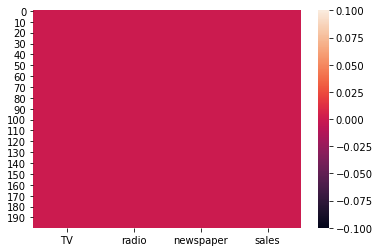

In [8]:
#To check null values (Visualize format)
sns.heatmap(df.isnull())
plt.show()

In [9]:
#To check the datatypes 
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [10]:
#We predict sales means contineous numerical value means apply regression
#algorithm

In [11]:
#To check relation between input and output
#First check relation between input : TV and output sales with the help of 
#scatter plot

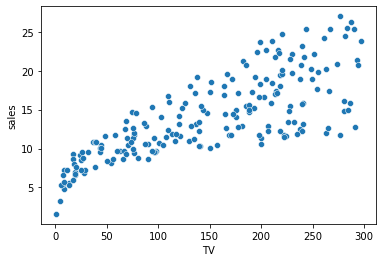

In [12]:
#First Input X=TV
X=df["TV"] #input means independent variable
Y=df["sales"] #output means dependent variable
sns.scatterplot(X,Y)
plt.show()

In [13]:
#Nice upword growth that means as we investment more on TV the sales is also
#increasing that means +ve correlation means good +ve correlation between
#TV(input) with sales(output)

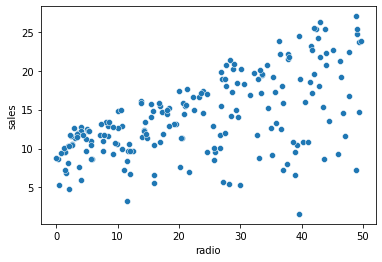

In [14]:
#secondly check relation between input : radio and output sales with the help of 
#scatter plot
X=df["radio"] #input variable
Y=df["sales"] #output variable
sns.scatterplot(X,Y)
plt.show()

In [15]:
#see the scatter plot radio with sales : - looks better but lot of data is 
#scattered but scatter data overhere +ve correlation, But correlation is less
#as compared to TV

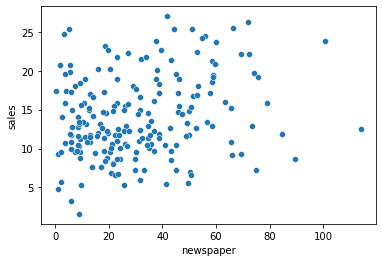

In [16]:
#visualise scatter plot 
#here X="newspaper"  here X means input and Y="sales" hete Y output means target
X=df["newspaper"] #input variable
Y=df["sales"] #output variable
sns.scatterplot(X,Y)
plt.show()

In [17]:
#It is very bed correlation means no +ve corr and no -ve corr means no
#correlation newspaper with sales because data point are scattered 

In [18]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [19]:
X=['TV', 'radio', 'newspaper'] #columns user defined list object
X

['TV', 'radio', 'newspaper']

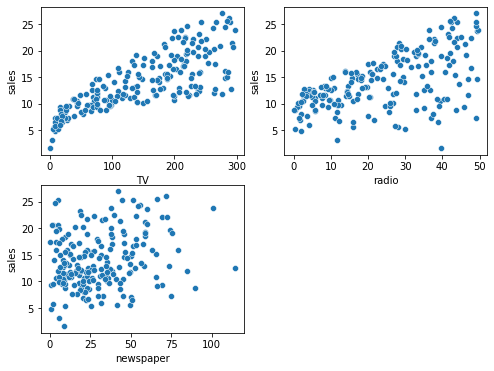

In [20]:
Y=df["sales"] #output 
plt.figure(figsize=(8,6))
for i,col in enumerate(X):
    #print(i," ",col)
    plt.subplot(2,2,i+1)#subplot(rows,cols,index+1)
    sns.scatterplot(df[col],Y)
plt.show()    

In [21]:
#check correlation between input and output
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


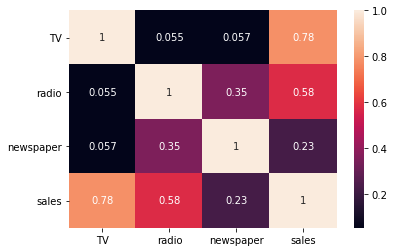

In [22]:
#Visualise corr() value
sns.heatmap(df.corr(),annot=True)
plt.show()


#correlation values with TV and sales=0.78 , It is very good
#correlation values with radio and sales=0.58 , It is good(ok)
#correlation values with newspaper and sales=0.23 , It is very bad

In [23]:
#Performing the modeling 
#Modeling with input : TV and output sales 
#SLR : only one input
#Select input and output from dataset

In [24]:
#Select Input and output from dataset
X=df[["TV"]] #input means independent variable (input always 2D array)
Y=df["sales"]

In [25]:
X.shape

(200, 1)

In [26]:
#train_test_split() : inbuilt  function It is used to split dataset 
#into training and testing , 70% data use in training and 30% data used in
#testing
#train_test_split()  : this function define in inbuilt class
#train_test_split class
from sklearn.model_selection import train_test_split

In [27]:
#create object of train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [28]:
X_train.shape

(140, 1)

In [29]:
X_test.shape

(60, 1)

In [30]:
Y_train.shape

(140,)

In [31]:
Y_test.shape

(60,)

In [32]:
X_train.head(10)

,TV
116,139.2
67,139.3
78,5.4
42,293.6
17,281.4
5,8.7
127,80.2
105,137.9
48,227.2
66,31.5


In [33]:
X_test.head()

,TV
58,210.8
40,202.5
34,95.7
102,280.2
184,253.8


In [34]:
Y_train.head()

116    12.2
67     13.4
78      5.3
42     20.7
17     24.4
Name: sales, dtype: float64

In [35]:
#Model perform with Linear Regression Algorithm
#call inbuilt class LinearRegression
from sklearn.linear_model import LinearRegression

In [36]:
#Create the object of LinearRegression class
lr=LinearRegression()

In [37]:
#train the model with 70% data , use fit() method of LinearRegression
lr.fit(X_train,Y_train)

LinearRegression()

In [38]:
#check slope/gradient/coefficient and intercept then use
m=lr.coef_
print("Slope : ",m)
c=lr.intercept_   
print("Intercept : ",c)

#coef_ and intercept_ both are inbuilt method of LinearRegression class

Slope :  [0.04812204]
Intercept :  6.923519536059554


In [39]:
#Test the model : use inbuilt method predict of LinearRegression class 
#equation of straight line Y_predict=m*X+c
Y_pred=lr.predict(X_test)

In [40]:
X_test.head()

,TV
58,210.8
40,202.5
34,95.7
102,280.2
184,253.8


In [41]:
Y_pred

array([17.06764591, 16.66823297, 11.52879892, 20.4073156 , 19.1368937 ,
       20.57093054, 14.78184893, 15.62398466, 10.32093567, 17.2890073 ,
       14.83959538, 10.25356482, 17.25532187, 12.20731971, 17.78947654,
       12.97246017, 13.26119242, 20.91259704,  8.1554438 , 17.06283371,
       11.75497252, 10.18619396,  8.13138278, 12.09182681, 12.35649804,
       15.98971218,  8.99757953, 18.89628349, 14.95027608, 18.47762173,
       18.46799732, 18.2081383 , 14.12738917, 15.11389102, 18.87703468,
       15.82128503, 17.62586159, 13.15051172, 17.35637816,  7.86671155,
        7.55391828, 11.2737521 ,  7.82340171, 16.74522823,  7.27481044,
       14.01189627, 10.68666319, 17.89534503, 16.78853807, 17.96752809,
       20.864475  , 12.84734286,  7.85708714, 15.71060434, 19.70473379,
       14.89252963, 17.43818563,  8.12657058, 18.0926454 ,  8.99276733])

In [42]:
Y_test

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    14.9
38     10.1
28     18.9
193    19.6
27     15.9
47     23.2
165    11.9
194    17.3
177    11.7
176    20.2
97     15.5
174    11.5
73     11.0
69     22.3
172     7.6
108     5.3
107     8.7
189     6.7
14     19.0
56      5.5
19     14.6
114    14.6
39     21.5
185    22.6
124    19.7
98     25.4
123    15.2
119     6.6
53     21.2
33     17.4
179    12.6
181    12.2
106     7.2
199    13.4
138     9.6
Name: sales, dtype: float64

In [43]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [44]:
#create a new dataframe which hold X_test ,Y_test and Y_pred
dic={'Y_test':Y_test,'Y_pred':Y_pred}
#convert dic into dataframe
df_result=pd.DataFrame(dic)
#to add X_test in df_result
df_result['X_test']=X_test
df_result

,Y_test,Y_pred,X_test
58,23.8,17.067646,210.8
40,16.6,16.668233,202.5
34,9.5,11.528799,95.7
102,14.8,20.407316,280.2
184,17.6,19.136894,253.8
198,25.5,20.570931,283.6
95,16.9,14.781849,163.3
4,12.9,15.623985,180.8
29,10.5,10.320936,70.6
168,17.1,17.289007,215.4


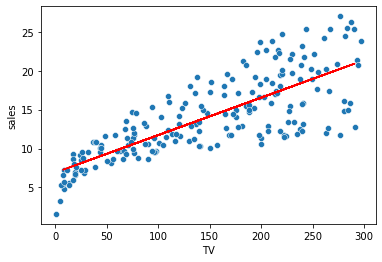

In [45]:
#visualise 
sns.scatterplot(df["TV"],df["sales"]) 
plt.plot(X_test,Y_pred,c="red") #line : - always 30% testing data
plt.show()

In [46]:
#Evaluation of Model  
from sklearn.metrics import mean_squared_error
e1=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error for TV-sales : ",e1)

Mean Squared Error for TV-sales :  10.571057434656955


In [47]:
#Root Mean Squared error
RMSE=np.sqrt(e1)
print("Root Mean Squared Error for TV-sales : ",RMSE)

Root Mean Squared Error for TV-sales :  3.251316261863333


In [48]:
#Evalution of model : find r2-score means r-squared (0-1)
#r2-score : check model is best perform or not
#r2_score inbuilt class which define in sklearn.metrics 
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred) #just fine means ok . no good and no bed

0.575061860494331

In [49]:
#Performing the modeling With the help of Simple Linear Regression 
#Modeling With input radio and target sales
#Step 1: First input means X and output Y(target)
X=df[["radio"]] #always input 2D [[]]
Y=df["sales"] #always output means target 1D 

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [51]:
#create the object of LinearRegression 
lr1=LinearRegression()

In [52]:
#Train the model with 70% data
lr1.fit(X_train,Y_train)

LinearRegression()

In [53]:
#Test the model with 30% data
Y_pred=lr1.predict(X_test)

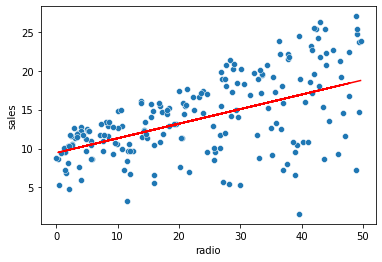

In [54]:
#visualise 
sns.scatterplot(df["radio"],df["sales"]) 
plt.plot(X_test,Y_pred,c="red") #line : - always 30% testing data
plt.show()

In [55]:
e1=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error for radio-sales : ",e1)
RMSE=np.sqrt(e1)
print("Root Mean Squared Error for TV-sales : ",RMSE)

Mean Squared Error for radio-sales :  14.604130559272193
Root Mean Squared Error for TV-sales :  3.8215351050686674


In [56]:
r2_score(Y_test,Y_pred) 

0.41293932917162335

In [57]:
#check slope/gradient/coefficient and intercept then use
m=lr1.coef_
print("Slope : ",m)
c=lr1.intercept_   
print("Intercept : ",c)

Slope :  [0.1874808]
Intercept :  9.440936561425886


In [58]:
#Performing the modeling With the help of Simple Linear Regression 
#Modeling With input newspaper and target sales
#Step 1: First input means X and output Y(target)
X=df[["newspaper"]] #always input 2D [[]]
Y=df["sales"] #always output means target 1D 

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [60]:
#Create a object of LinearRegression class
lr2=LinearRegression()

In [61]:
#train the model 
lr2.fit(X_train,Y_train)

LinearRegression()

In [62]:
#check slope/coefficeint and intercept
print("slope : ",lr2.coef_)  #Y=m*TV+b
print("Intercept : ",lr2.intercept_)

slope :  [0.06532045]
Intercept :  11.829668884877877


In [63]:
#Testing the model 
#perform the testing use predict() inbuilt method of LinearRegression class
Y_pred=lr2.predict(X_test) #Y_pred=m*TV+b


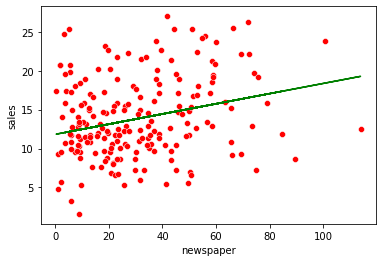

In [64]:
#Visualise predicted line
sns.scatterplot(data=df,x="newspaper",y="sales",color="red")
plt.plot(X_test,Y_pred,color="green") #plot(input,output)
plt.show()

In [65]:
mean_squared_error(Y_test,Y_pred)

25.49745237441493

In [66]:
#Evaluation of model
r2_score(Y_test,Y_pred)

-0.024953278429509007

In [67]:
#check slope/gradient/coefficient and intercept then use
m=lr2.coef_
print("Slope : ",m)
c=lr2.intercept_   
print("Intercept : ",c)

Slope :  [0.06532045]
Intercept :  11.829668884877877


In [68]:
''' 
slope of TV : 0.04812204  and MSE of TV  :  10.571057434656955 r2-score=0.578
slope of radio :0.1874808 and MSE of radio : 14.604130559272193 r2-score=0.41
slope of newspaper : 0.06532045 and MSE of newspaper :25.49745237441493 r2=-0.02
'''

' \nslope of TV : 0.04812204  and MSE of TV  :  10.571057434656955 r2-score=0.578\nslope of radio :0.1874808 and MSE of radio : 14.604130559272193 r2-score=0.41\nslope of newspaper : 0.06532045 and MSE of newspaper :25.49745237441493 r2=-0.02\n'

In [69]:
#multiple linear regression means many input but output only one 
#Equation of MLR  :   Y_pred=m1X1+m2X2+m3X3+......+mnXn+b
#select input and output from dataset : df
X=df[["TV","radio","newspaper"]] #Input 2D
Y=df["sales"]#output 1D

In [70]:
#train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [71]:
X_train.head()

,TV,radio,newspaper
116,139.2,14.3,25.6
67,139.3,14.5,10.2
78,5.4,29.9,9.4
42,293.6,27.7,1.8
17,281.4,39.6,55.8


In [72]:
#perform the model 
#Create a object of LinearRegression class
lr=LinearRegression()

In [73]:
#train the model use fit() 
lr.fit(X_train,Y_train)

LinearRegression()

In [74]:
#check slope/coefficient and intercept
print("slope : ",lr.coef_)  #Y=m1*TV+m2*radio+m3*newspaper+b
print("Intercept : ",lr.intercept_)

slope :  [0.04695205 0.17658644 0.00185115]
Intercept :  2.9372157346906107


In [75]:
X_test.head()

,TV,radio,newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [76]:
#Test the model with 30% data
Y_pred=lr.predict(X_test) #Y=m1*TV+m2*radio+m3*newspaper+c

In [77]:
Y_pred

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113,
       23.79199311, 16.2825425 , 13.44138683,  9.15294033, 17.32475313,
       14.43922876,  9.84019547, 17.26329945, 16.62853147, 15.09158705,
       15.50173894, 12.43404074, 17.32591521, 11.04327486, 18.05652777,
        9.35309526, 12.79465958,  8.73413846, 10.47225333, 11.38216042,
       15.02658554,  9.7406823 , 19.44676903, 18.19211174, 17.20178728,
       21.56359539, 14.70484262, 16.2635213 , 12.37098906, 19.97059316,
       15.36768988, 14.00399515, 10.0772945 , 20.91891557,  7.43833283,
        3.67031166,  7.27760354,  5.99523188, 18.41497546,  8.31868226,
       14.1090252 , 14.93697583, 20.35882814, 20.56271636, 19.55380813,
       24.10360923, 14.84985778,  6.71474914, 19.77761567, 18.93996367,
       12.5109195 , 14.20052652,  6.10844697, 15.3695344 ,  9.56769111])

In [78]:
Y_test

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    14.9
38     10.1
28     18.9
193    19.6
27     15.9
47     23.2
165    11.9
194    17.3
177    11.7
176    20.2
97     15.5
174    11.5
73     11.0
69     22.3
172     7.6
108     5.3
107     8.7
189     6.7
14     19.0
56      5.5
19     14.6
114    14.6
39     21.5
185    22.6
124    19.7
98     25.4
123    15.2
119     6.6
53     21.2
33     17.4
179    12.6
181    12.2
106     7.2
199    13.4
138     9.6
Name: sales, dtype: float64

In [79]:
dic={'Y_test':Y_test,'Y_pred':Y_pred}
df_new=pd.DataFrame(dic)

df_new

,Y_test,Y_pred
58,23.8,21.663183
40,16.6,16.441379
34,9.5,7.691446
102,14.8,17.916317
184,17.6,18.670471
198,25.5,23.791993
95,16.9,16.282543
4,12.9,13.441387
29,10.5,9.152940
168,17.1,17.324753


In [80]:
mean_squared_error(Y_test,Y_pred)

1.9289249074665724

In [81]:
r2_score(Y_test,Y_pred)

0.9224605706201435

In [82]:
#here r2-score is best because nearest to +1 and MSE is very low means we
#create a successful model 

# Assumption Of Linear Regression 

In [83]:
#But 
# Assumptions of Linear Regression : -
'''1. should not be Multicolinearity in linear regression  
 Solve this assumption .means we removed the Multicolinearity situation
 2. Assumption :  Linear relationship means There should be a linear relation
 ship. 
 when does linear regression  do best work ? 
 where got better relationship 
 
 we cannot see 3D graph on system so we have some hack(trick) , how to 
 check input and output both are related or not
 we calculate the residual (this is error means 
 Residual =(actual output-predicted output)
 '''

'1. should not be Multicolinearity in linear regression  \n Solve this assumption .means we removed the Multicolinearity situation\n 2. Assumption :  Linear relationship means There should be a linear relation\n ship. \n when does linear regression  do best work ? \n where got better relationship \n \n we cannot see 3D graph on system so we have some hack(trick) , how to \n check input and output both are related or not\n we calculate the residual (this is error means \n Residual =(actual output-predicted output)\n '

In [84]:
'''
1. should not be Multicolinearity in linear regression  
 Solve this assumption .means we removed the Multicolinearity situation
 '''

'\n1. should not be Multicolinearity in linear regression  \n Solve this assumption .means we removed the Multicolinearity situation\n '

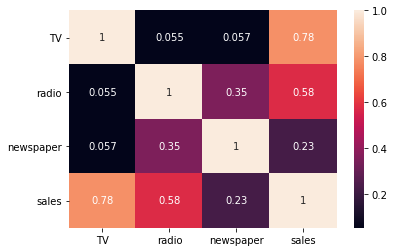

In [85]:
#for multicolinearity : check correlation between inputs
sns.heatmap(df.corr(),annot=True)
plt.show()

In [86]:
#here input radio and newspaper both are corelated each other value of corr 
#between radio and newspaper =0.35 means multicolinearity situation occurs
#so check corr of both input radio and newspapaer with o/p and remove those 
#input column whose corr value with o/p will be less 
#here newspaper is less correlated with o/p sales as compared to radio with
#sales so remove newspaper from dataset 
#and perform TV and radio with sales 

In [87]:
#we take input TV and radio with output sales
X=df[["TV","radio"]] #input
Y=df["sales"]#output

In [88]:
#train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [89]:
X_train.head()

,TV,radio
116,139.2,14.3
67,139.3,14.5
78,5.4,29.9
42,293.6,27.7
17,281.4,39.6


In [90]:
#create object of LinearRegression class
lr=LinearRegression()

In [91]:
#train the model
lr.fit(X_train,Y_train)

LinearRegression()

In [92]:
#check slope/coefficient and intercept
print("slope : ",lr.coef_)  #Y=m1*TV+m2*radio+m3*newspaper+b
print("Intercept : ",lr.intercept_)

slope :  [0.04697554 0.17765046]
Intercept :  2.9647671191401574


In [93]:
#Test the model
Y_pred=lr.predict(X_test) #Y_pred=m1*TV+m2*radio+c

In [94]:
mean_squared_error(Y_test,Y_pred)

1.9147050289721788

In [95]:
r2_score(Y_test,Y_pred)

0.9230321850256801

In [96]:
#Solve 3rd assumption of linear regression (no Multicolinearity)

In [97]:
#Work on 1st and 2nd Assumption of Linear Regression 
#1. there should be a linear relationship
#2. if occur linear relation then next check relation is homoskedatik 
#not a heteroskedastik

In [98]:
#Check Linear relation between input and output 
#use some tricks
#find residual
residual=Y_test-Y_pred
residual

58     2.121325
40     0.161080
34     1.790963
102   -3.121584
184   -1.071115
198    1.751649
95     0.650372
4     -0.476570
29     1.376352
168   -0.175850
171    0.094861
18     1.442691
11     0.085973
89     0.085626
110   -1.628579
118    0.475105
159    0.479785
35    -4.548925
136   -1.595709
59     0.296797
51     1.313444
16    -0.151716
44    -0.209470
94     1.002953
31     0.540576
162   -0.130433
38     0.367320
28    -0.566610
193    1.338393
27    -1.310358
47     1.593306
165   -2.684544
194    0.978638
177   -0.645678
176    0.201464
97     0.118795
174   -2.516140
73     0.943990
69     1.352080
172    0.143738
108    1.648793
107    1.435349
189    0.707220
14     0.602824
56    -2.799666
19     0.469889
114   -0.352296
39     1.127387
185    1.993211
124    0.216236
98     1.311803
123    0.305838
119   -0.118500
53     1.450047
33    -1.594481
179    0.079578
181   -1.988236
106    1.106689
199   -1.995585
138    0.014138
Name: sales, dtype: float64

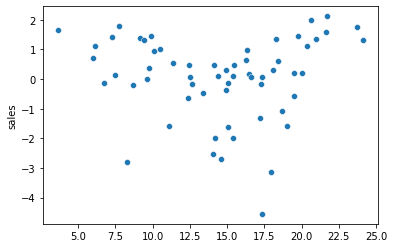

In [99]:
#visualize scatterplot between Y_pred and residuals means 
#here input x=Y_pred  and y=residuals because residuals depend on y_pred value
#plt.figure()
sns.scatterplot(Y_pred,residual)
plt.show()

In [100]:
# in above scatterplot, This is not a linear relation between Y_pred
# and residuel means no relation between x=["TV","radio"] with sales o/p
#means this assumption is not fullfill

##2. Assumption :  if occur linear relation then next check relation is 
#homoskedatik not a heteroskedastik but no found any linear relation means
#not satify 2nd assumption
#means 2nd Assumption totally depend on First Assumption

In [101]:
#4. Assumption of linear regression : - Residual should be normally distributed
#curve means data should be euqally divide on both sides.
#normal distributed curve then use inbuilt function displot() of seaborn
#library ,distplot is also known as frequency graph
#use distplot()

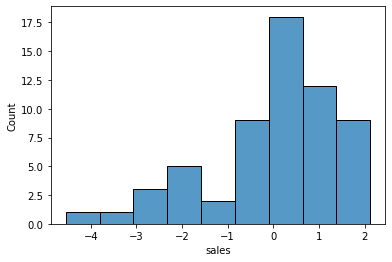

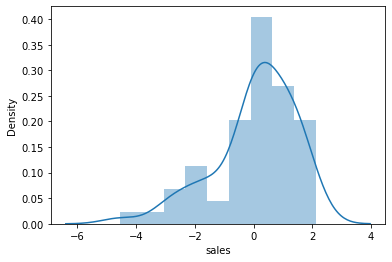

-1.093518163944733

In [102]:
sns.histplot(residual)

plt.show()
sns.distplot(residual)
plt.show()
#check skewness
residual.skew()

In [103]:
#polynomial Linear Regression
#create user defined function for different power of independent variable X
#Linear  means degree/power=1 of independent variable X means Y=mX+b
def poly_1(X):  #here poly_1()  user defined function it is passing argument 
    #and return value and here X independent variable
    m=4 #slope /gradient/coef 
    b=5 #intercept
    Y=m*X+b  #Y=4*-100+5
    return Y  #return output

In [104]:
#main program
#create a 1D numpy array
X=np.arange(-100,100)  #start =-100 stop=99 step=+1
#print(X)
#call function 
Y=poly_1(X)
#print(Y)
#create dictionary
dic={'Ínput_X':X,'Output_Y':Y}
P=pd.DataFrame(dic)
print(P)

     Ínput_X  Output_Y
0       -100      -395
1        -99      -391
2        -98      -387
3        -97      -383
4        -96      -379
..       ...       ...
195       95       385
196       96       389
197       97       393
198       98       397
199       99       401

[200 rows x 2 columns]


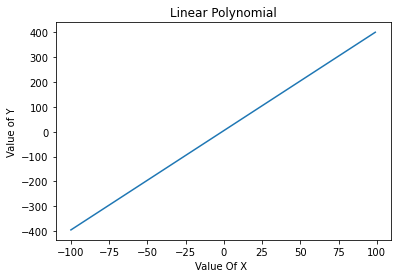

In [105]:
#visualize
plt.plot(X,Y)
plt.title("Linear Polynomial")
plt.xlabel("Value Of X ")
plt.ylabel("Value of Y")
plt.show()

In [106]:
#increase the degree of input X=2
#then equation : Quadratic means ax^2+bx+c=0 
#equation Y=m1*X^2+m2*X^1+c
#create a user defined function for degree=2
def poly_2(X):
    m1=6
    m2=4
    c=5
    Y=m1*(X**2)+m2*X+c
    return Y

In [107]:
#main program
#create a 1D numpy array
X=np.arange(-100,100)  #start =-100 stop=99 step=+1
#print(X)
#call function 
Y=poly_2(X)
#print(Y)
#create dictionary
dic={'Ínput_X':X,'Output_Y':Y}
P=pd.DataFrame(dic)
print(P)

     Ínput_X  Output_Y
0       -100     59605
1        -99     58415
2        -98     57237
3        -97     56071
4        -96     54917
..       ...       ...
195       95     54535
196       96     55685
197       97     56847
198       98     58021
199       99     59207

[200 rows x 2 columns]


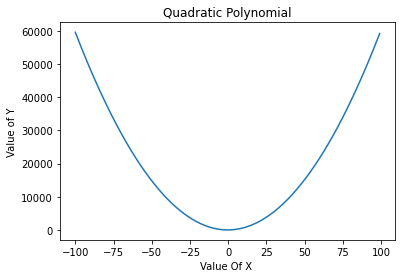

In [108]:
#visualize
plt.plot(X,Y)
plt.title("Quadratic Polynomial")
plt.xlabel("Value Of X ")
plt.ylabel("Value of Y")
plt.show()

In [109]:
#increase the degree of input X=3
#then equation : Cubic means ax^3+bx^2+cX^1+d=0
#equation Y=m1*X^3+m2*X^2+m3*X^1+c
#create a user defined function for degree=3
def poly_3(X):
    m1=8
    m2=6
    m3=4
    c=5
    Y=m1*(X**3)+m2*(X**2)+m3*X+c
    return Y

In [110]:
#main program
#create a 1D numpy array
X=np.arange(-100,100)  #start =-100 stop=99 step=+1
#print(X)
#call function 
Y=poly_3(X)
#print(Y)
#create dictionary
dic={'Ínput_X':X,'Output_Y':Y}
P=pd.DataFrame(dic)
print(P)

     Ínput_X  Output_Y
0       -100  -7940395
1        -99  -7703977
2        -98  -7472299
3        -97  -7245313
4        -96  -7022971
..       ...       ...
195       95   6913535
196       96   7133573
197       97   7358231
198       98   7587557
199       99   7821599

[200 rows x 2 columns]


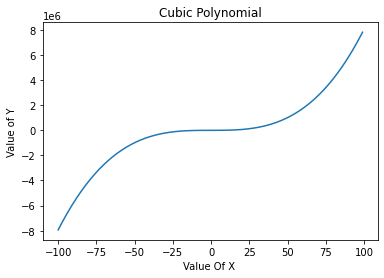

In [111]:
#visualize
plt.plot(X,Y)
plt.title("Cubic Polynomial")
plt.xlabel("Value Of X ")
plt.ylabel("Value of Y")
plt.show()

In [112]:
#Increase degree of input of our dataset 
#Input : TV and radio means X1=TV X2=radio  and output Y=sales
#Y=m1*(X1**2)+m2*(X1**1)+m3*(X2**2)+m4*(X2**1)+c
#equation Y=m1*TV**2+m2*TV+m3*radio**2+m4*radio+b
#we work on dataset 
#apply polynomial linear regression means increase the degree of independent
#variable X means degree=2 
#equation : ax2+bx+c=0  here 2 inputs ax1**2+bx1+cx2**2+dx2+e
#here we have 2 inputs : - X=TV,radio means X1="TV" and X2="radio"
#eq. m1*TV**2+m2*TV**1+m3*radio**2+m4*radio**1+b

In [113]:
#Select input and output
X=df[["TV","radio"]] #2D input #Y=m1*TV+m2*radio+c
Y=df["sales"]#1D output

In [114]:
#call PolynomialFeatures inbuilt class which define in sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [115]:
#create object of PolynomialFeatures class and pass the degree  
#means how much degree 
pf=PolynomialFeatures(2)

In [116]:
X_poly=pf.fit_transform(X)
#we create polynomial version of X so we call fit_transform() : inbuilt
#method of PolynomialFeatures class

In [117]:
X_poly

array([[1.000000e+00, 2.301000e+02, 3.780000e+01, 5.294601e+04,
        8.697780e+03, 1.428840e+03],
       [1.000000e+00, 4.450000e+01, 3.930000e+01, 1.980250e+03,
        1.748850e+03, 1.544490e+03],
       [1.000000e+00, 1.720000e+01, 4.590000e+01, 2.958400e+02,
        7.894800e+02, 2.106810e+03],
       ...,
       [1.000000e+00, 1.770000e+02, 9.300000e+00, 3.132900e+04,
        1.646100e+03, 8.649000e+01],
       [1.000000e+00, 2.836000e+02, 4.200000e+01, 8.042896e+04,
        1.191120e+04, 1.764000e+03],
       [1.000000e+00, 2.321000e+02, 8.600000e+00, 5.387041e+04,
        1.996060e+03, 7.396000e+01]])

In [118]:
21/2/22
#m1*tv**2+m2*tv**1+m3*radio**2+m4*radio**1+b

0.4772727272727273

In [119]:
#train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [120]:
#WE Train the model with 70% dta using linear regression class 
#create the object of linear regresson class
lr=LinearRegression()

In [121]:
#train model with 70% data (fit nd predict method linear regression)
lr.fit(X_train,Y_train)

LinearRegression()

In [122]:
#we testing the model means prediction 
Y_pred=lr.predict(X_test)

In [123]:
#mean square error
print("mean_squared_error:",mean_squared_error(Y_test,Y_pred))

mean_squared_error: 0.17238345081004114


In [124]:
#chek slope
lr.coef_

array([ 0.        ,  0.05281975,  0.02122044, -0.00011661,  0.00109146,
        0.00025159])

In [125]:
lr.intercept_

5.149123107203531

In [126]:
#error is very less as previous [mean_squared_error: 1.9

In [127]:
#r2_score
print("r2 squared score:",r2_score(Y_test,Y_pred))

r2 squared score: 0.993070484828828


In [128]:
#work on assumption
#create the normal distribution curve with the help of residuals 
#find residuals
residuals=Y_test-Y_pred

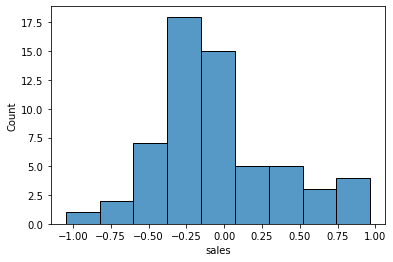

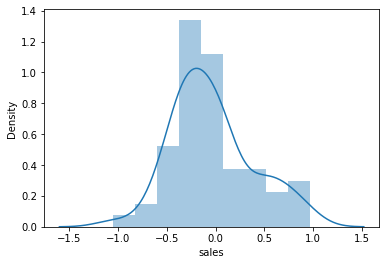

0.524362491792352

In [129]:
sns.histplot(residuals)
plt.show()
sns.distplot(residuals)
plt.show()
#check skewness
residuals.skew()

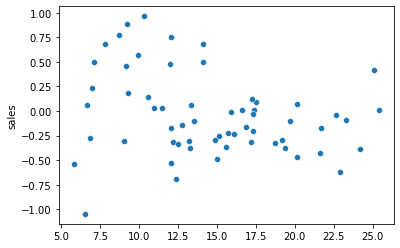

In [130]:
#next assumption
#ther should be a linear realtion
#plot scatter plot
plt.figure()
sns.scatterplot(Y_pred,residuals)
plt.show()

In [132]:
#3 one
#create the object of polynomial features class and pass the degree 
#means how much degree
pf=PolynomialFeatures(3)

In [133]:
X_poly=pf.fit_transform(X)
#we create polynomial version of X so we call fit_transform() : inbuilt
#method of PolynomialFeatures class

In [134]:
#train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [135]:
#WE Train the model with 70% dta using linear regression class 
#create the object of linear regresson class
lr=LinearRegression()

In [136]:
#train model with 70% data (fit nd predict method linear regression)
lr.fit(X_train,Y_train)

LinearRegression()

In [137]:
#we testing the model means prediction 
Y_pred=lr.predict(X_test)

In [138]:
#mean square error
print("mean_squared_error:",mean_squared_error(Y_test,Y_pred))

mean_squared_error: 0.1446907864680823


In [139]:
#chek slope
lr.coef_

array([ 0.00000000e+00,  9.16483199e-02,  2.25347616e-02, -4.65701531e-04,
        1.30652795e-03, -1.62567917e-04,  8.31531755e-07, -7.44270012e-07,
       -1.18928234e-06,  9.37589630e-06])

In [140]:
lr.intercept_

4.1621474772011045

In [ ]:
#error is very less as previous [mean_squared_error: 1.9

In [141]:
#r2_score
print("r2 squared score:",r2_score(Y_test,Y_pred))

r2 squared score: 0.9941836818137244


In [142]:
#work on assumption
#create the normal distribution curve with the help of residuals 
#find residuals
residuals=Y_test-Y_pred

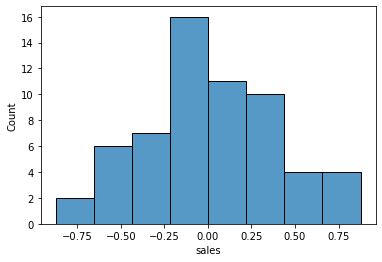

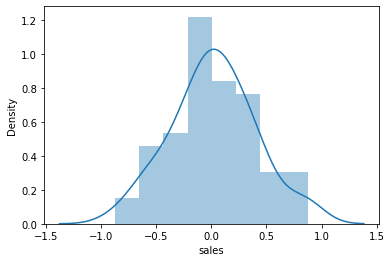

0.07135639589176812

In [143]:
sns.histplot(residuals)
plt.show()
sns.distplot(residuals)
plt.show()
#check skewness
residuals.skew()

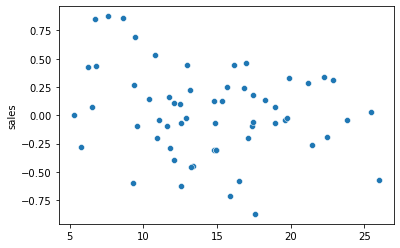

In [144]:
#next assumption
#ther should be a linear realtion
#plot scatter plot
plt.figure()
sns.scatterplot(Y_pred,residuals)
plt.show()

In [ ]:
#if take degree of input =3 then 
#here this is linear relation ship between residuals and Y_pred 
#means input and output are related to each other
#but datpoints are scattered means heteroskadastic but should be homoskedastik
#means datapoints are close each other